# SUPPLEMENTARY FIGURES
RUN THIS NOTEBOOK TO GET ALL SUPPLEMENTARY FIGURES IN THE MANUSCRIPT

In [1]:
from functions import *

# SUPPFIG S1

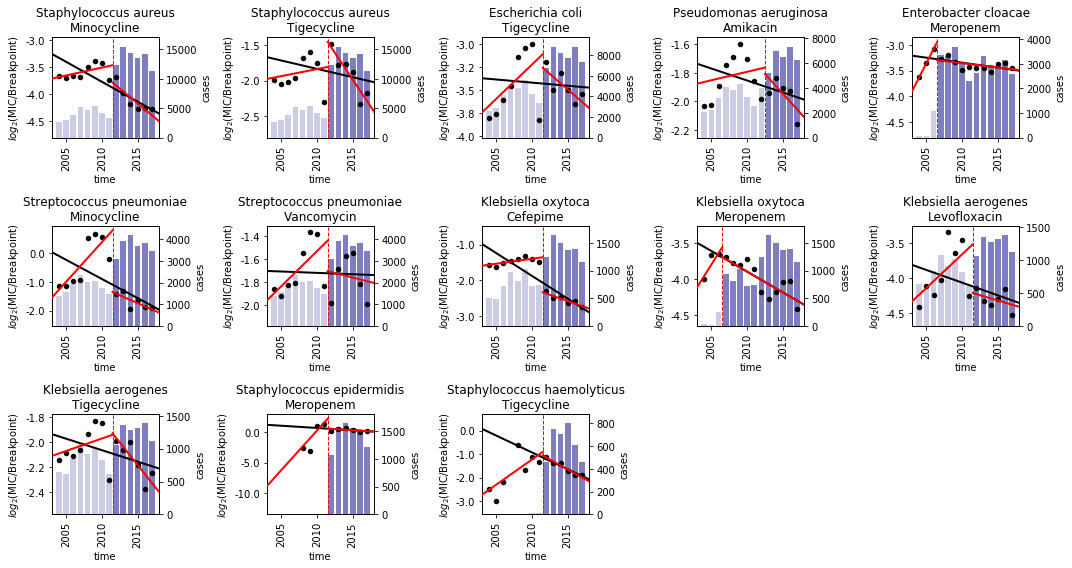

In [2]:
DF=pd.read_csv('data/average_mic_per_year_complete.csv')
Ch=pd.read_csv('data/changepoint_analysis.csv')
Ch=Ch[(Ch['Slope Before']>0) & (Ch['Slope After']<0)]
Ch=Ch.reset_index(drop=True)
nrows=3
ncols=5
fig=plt.figure(figsize=(15,8))
for index, row in Ch.iterrows():
    sp=row['Species']
    dr=row['Antibiotic']
    tau=row['Changepoint']
    s1=row['Slope After']
    i1=row['Intercept After']
    s2=row['Slope Before']
    i2=row['Intercept Before']
    s0=row['Slope Global']
    i0=row['Intercept Global']
    DFsp=DF[(DF.Species==sp) & (DF.Antibiotic==dr)]
    YMIC=DFsp['Year'].tolist()
    MIC=DFsp['Average MIC'].tolist()
    totalcases=DFsp['Number of cases'].tolist()
    ax=fig.add_subplot(nrows, ncols, index+1)
    ax2=ax.twinx()
    ax.set_zorder(ax2.get_zorder()+1)# put ax in front of ax2
    ax.patch.set_visible(False)# hide the 'canvas'
    yT=YMIC.index(tau)
    ax2.bar(YMIC[0:yT], totalcases[0:yT], facecolor='navy', alpha=0.2)
    ax2.bar(YMIC[yT::], totalcases[yT::], facecolor='navy', alpha=0.5)
    ax2.plot([tau-0.5,tau-0.5],[0,1.1*np.max(totalcases)], '--r', linewidth=1)
    ax.scatter(YMIC, MIC, color='k', s=20, label='MIC')
    #PLOT SLOPE
    yM=np.linspace(2000,2020,100)
    yp=[i0+s0*z for z in yM]
    if s0!=0:
        ax.plot(yM,yp, 'k', zorder=10, linewidth=2)
    #PLOT SECOND SLOPE
    yM=np.linspace(tau-0.5,2020,100)
    yp=[i1+s1*z for z in yM]
    if s1!=0:
        ax.plot(yM,yp, 'r', zorder=10, linewidth=2)
    #PLOT THIRD SLOPE
    yM=np.linspace(2000,tau-0.5,100)
    yp=[i2+s2*z for z in yM]
    if s2!=0:
        ax.plot(yM,yp, 'r', zorder=10, linewidth=2)
    #PLOT DETAILS
    ax.set_xlabel('time')
    ax.set_ylabel('$log_2$(MIC/Breakpoint)')
    ax2.set_ylabel('cases')
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.set_yticklabels(ax.get_yticks())
    if max(totalcases)<4:
        ax2.set_yticks(range(0, 1+max(totalcases)))
    ax2.set_yticklabels(ax2.get_yticks())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_title(sp+'\n'+dr)
    ax.set_xlim([2003,2018])
    ax2.set_ylim([0,1.1*np.max(totalcases)])
fig.tight_layout()

# SUPPFIG S2

/home/pcatalan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


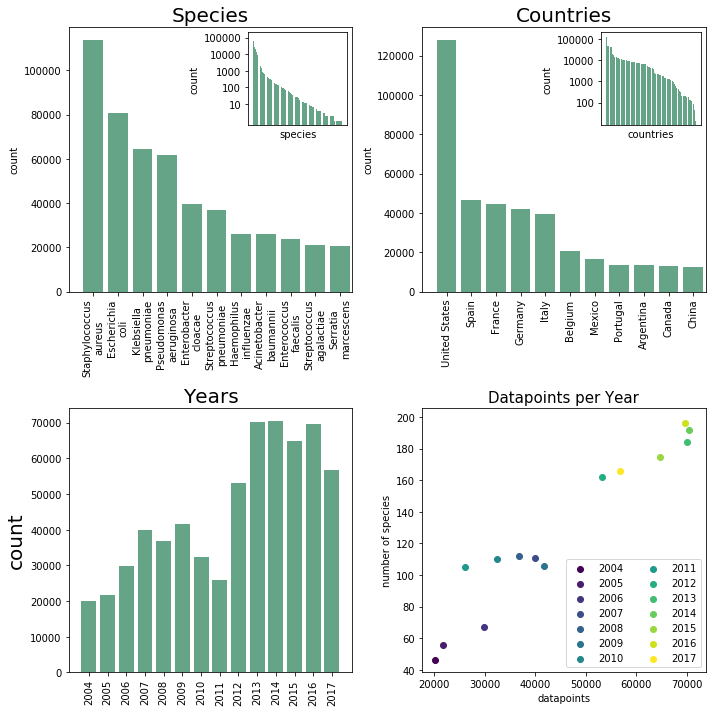

In [3]:
#%%DATASET DESCRIPTION
spC=pd.read_csv('data/key_Species.txt', '\t', header=None)
cC=pd.read_csv('data/key_Country.txt', '\t', header=None)
yC=pd.read_csv('data/key_Year.txt', '\t', header=None)
spC=spC.sort_values([1],ascending=False)
cC=cC.sort_values([1],ascending=False)
yC=yC.sort_values([1],ascending=False)
Lab=[z.replace(' ','\n') for z in spC[0]]


fig=plt.figure(figsize=(10,10))
color1='#006837'
#FIG S1A
ax=fig.add_subplot(2,2,1)
ax.bar(spC[0],spC[1], facecolor=color1, alpha=0.6)
ax.set_xticklabels(Lab, rotation=90)
ax.set_xlim([-1,10.5])
ax.set_ylabel('count')
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
#INSET
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
a=inset_axes(ax,width="35%",height="35%",loc='upper right')
a.bar(spC[0],spC[1], facecolor=color1, alpha=0.6)
a.set_yscale('log')
a.set_ylabel('count')
a.set_yticks([10, 100, 1000, 10000, 100000])
a.set_yticklabels(ax.get_yticks(), size=10)
a.set_xticks([])
a.set_xlabel('species', fontsize=10)
a.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Species', fontsize=20)

#FIG S1B
ax=fig.add_subplot(2,2,2)
ax.bar(cC[0],cC[1], facecolor=color1, alpha=0.6)
ax.set_xticklabels(cC[0], rotation=90)
ax.set_xlim([-1,10.5])
ax.set_ylabel('count')
ax.set_yticklabels(ax.get_yticks(), size=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
a=inset_axes(ax,width="35%",height="35%",loc='upper right')
a.bar(cC[0],cC[1], facecolor=color1, alpha=0.6)
a.set_yscale('log')
a.set_ylabel('count', fontsize=10)
a.set_yticks([100, 1000, 10000, 100000])
a.set_yticklabels(ax.get_yticks())
a.set_xticks([])
a.set_xlabel('countries', fontsize=10)
a.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Countries', fontsize=20)

#FIG S1C
ax=fig.add_subplot(2,2,3)
ax.bar(yC[0],yC[1], facecolor=color1, alpha=0.6)
ax.set_xticks(sorted(yC[0]))
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_ylabel('count', fontsize=20)
ax.set_yticklabels(ax.get_yticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Years', fontsize=20)

#FIG S1D
ax=fig.add_subplot(2,2,4)
DF=pd.read_csv('data/datapoints_per_year.csv')
yL=DF['Year'].tolist()
spL=DF['Species'].tolist()
dataL=DF['Datapoints'].tolist()
vals = np.linspace(0,1,len(spL))
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
labels=[str(z) for z in yL]
colors=[cmap(z) for z in vals]
for y1,y in enumerate(yL):
    ax.scatter(dataL[y1],spL[y1],c=[colors[y1]],label=labels[y1])
ax.legend(loc='lower right', ncol=2)
ax.set_xticklabels(ax.get_xticks())
ax.set_xlabel('datapoints')
ax.set_yticklabels(ax.get_yticks())
ax.set_ylabel('number of species')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_title('Datapoints per Year', fontsize=15)
fig.tight_layout()

# SUPPFIG S3

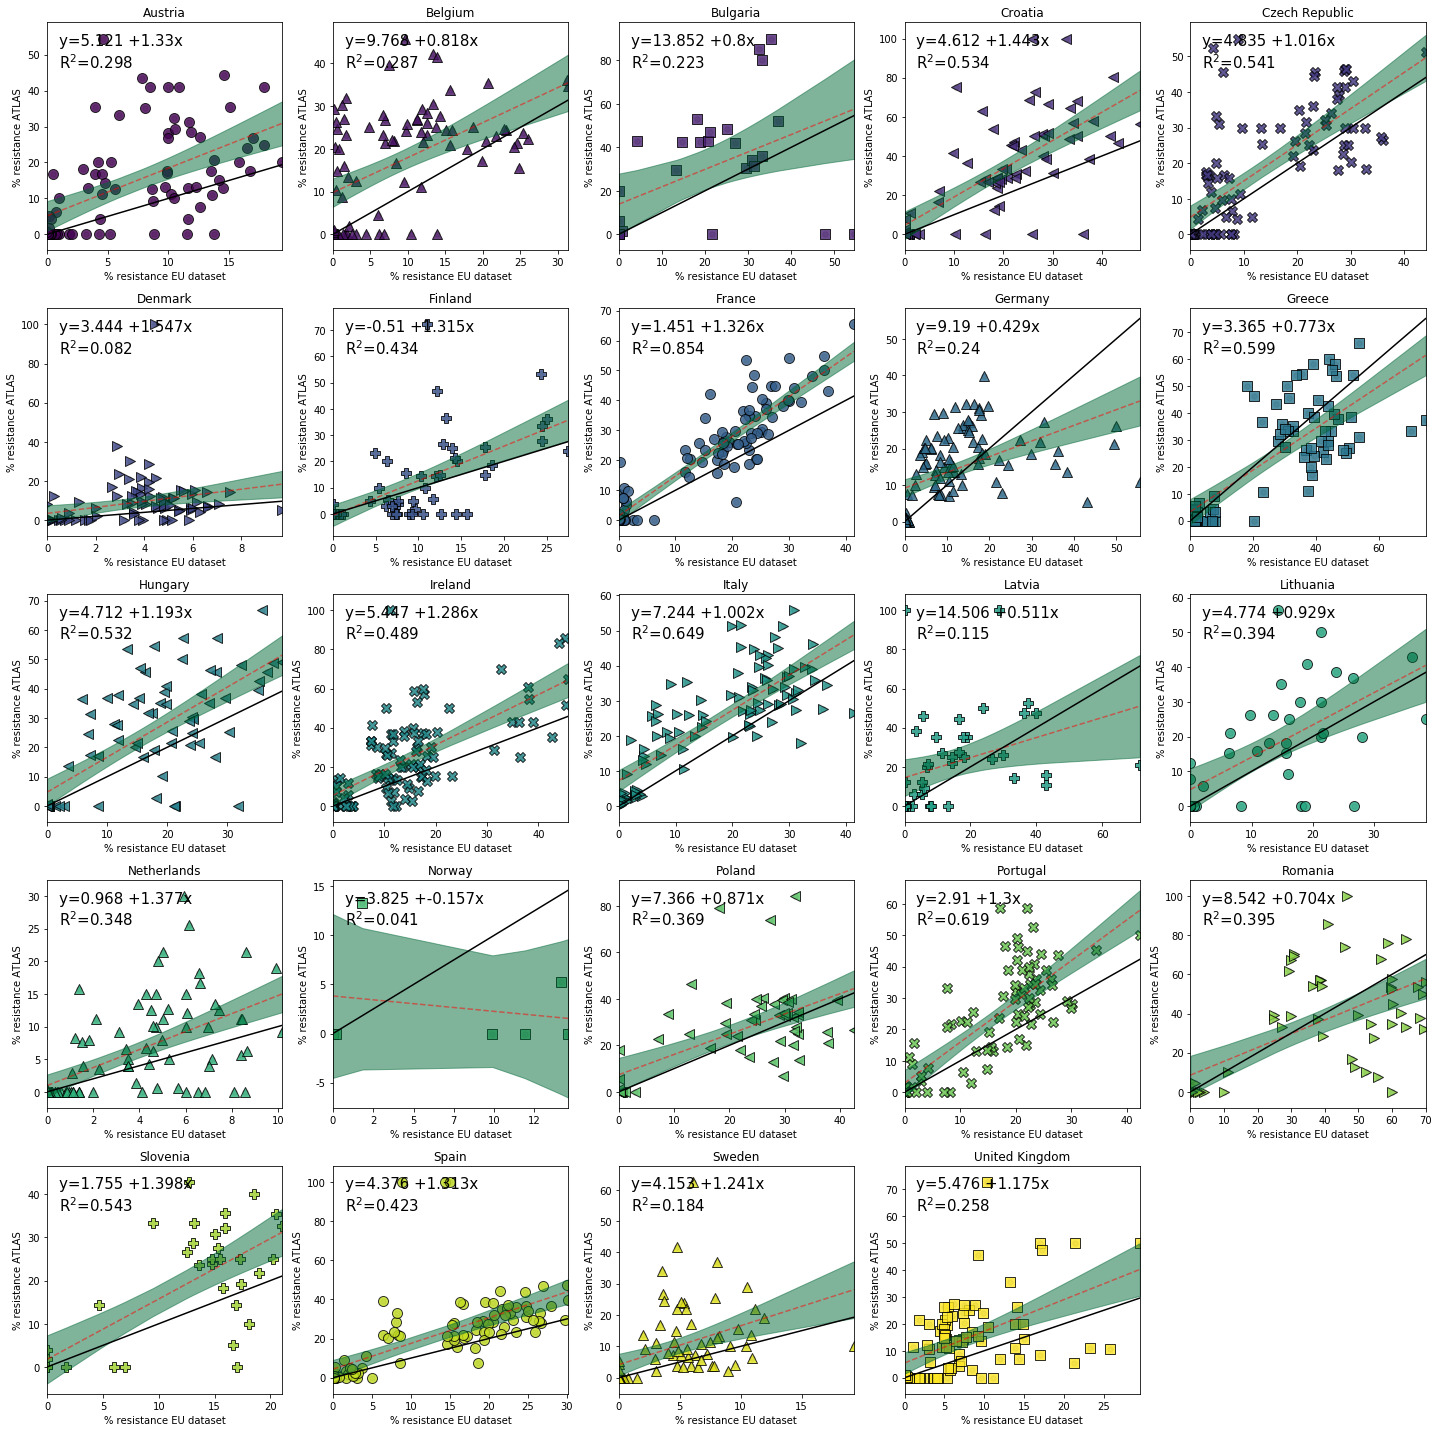

In [4]:
RD=pd.read_excel('data/atlas_vs_ecdc.xls')
#NOW PLOT EVERY COUNTRY
fig=plt.figure(figsize=(20,20))
cL=sorted(get_key(RD,'Country'))
#colors and symbols for each country
vals=np.linspace(0,1,len(cL))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
LS=['o', '^', 's', '<', 'X', '>', 'P']
sM={}
cM={}
for i1,country in enumerate(cL):
    cM[country]=cmap(i1/len(cL))
    sM[country]=LS[i1%len(LS)]
#PLOT
color1='#006837'
csDF=pd.read_csv('data/key_Country.txt', sep='\t', header=None, names=['Country','Size'])
for i1,country in enumerate(cL):
    ax=fig.add_subplot(5,5,i1+1)
    RDC=RD[RD.Country==country]
    xC=RDC['ECDCValue']
    yC=RDC['ATLASValue']
    x1,y_hat,lower,upper,R2, slope, intercept=LR(xC,yC)
    ax.scatter(xC,yC,s=30,c='k', alpha=0.2)
    ax.scatter(xC,yC,c=[cM[country]], s=100, edgecolors='k',alpha=0.8,
               marker=sM[country])
    ax.plot(x1,y_hat,'--r', alpha=0.5)
    ax.set_title(country)
    ax.fill_between(x1, lower, upper, color=color1, alpha=0.5)
    ax.plot(x1,x1,'-k')
    R2=np.round(R2*1000)/1000
    slope=np.round(slope*1000)/1000
    intercept=np.round(intercept*1000)/1000
    ax.text(0.05, 0.80, 'R$^2$='+str(R2), fontsize=15, transform=ax.transAxes)
    ax.text(0.05, 0.90, 'y='+str(intercept)+' +'+str(slope)+'x', fontsize=15, transform=ax.transAxes)
    ax.set_xlabel('% resistance EU dataset')
    ax.set_ylabel('% resistance ATLAS')
    ax.set_yticklabels(ax.get_yticks())
    ax.set_xticklabels(ax.get_xticks())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.set_xlim([0,min(100,max(x1))])
fig.tight_layout()

# SUPPFIG S4

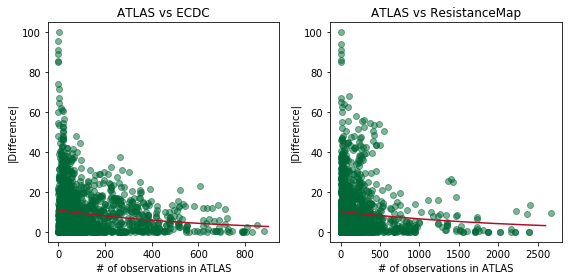

In [5]:
def exp(x,a,b):
    return a*np.exp(-b*x)


color1='#006837'
color2='#B40E26'
fig=plt.figure(figsize=(8,4))
#ATLAS VS ECDC
ax=fig.add_subplot(1,2,1)
RD=pd.read_excel('data/atlas_vs_ecdc.xls')
x=RD['N']
y=np.abs(RD['Diff'])
ax.plot(x,y,'o', color=color1, alpha=0.5)
popt, pcov=curve_fit(exp, x, y, p0=[40,0.5])
xp=np.linspace(0,900,1000)
yp=exp(xp,*popt)
ax.plot(xp,yp,color=color2)
ax.set_xlabel('# of observations in ATLAS')
ax.set_ylabel('|Difference|')
ax.set_title('ATLAS vs ECDC')

#ATLAS VS RESISTANCEMAP
ax=fig.add_subplot(1,2,2)
RD=pd.read_excel('data/atlas_vs_resistancemap.xls')
x=RD['N']
y=np.abs(RD['Diff'])
ax.plot(x,y,'o', color=color1, alpha=0.5)
popt, pcov=curve_fit(exp, x, y, p0=[40,0.5])
xp=np.linspace(0,2600,1000)
yp=exp(xp,*popt)
ax.plot(xp,yp,color=color2)
ax.set_xlabel('# of observations in ATLAS')
ax.set_ylabel('|Difference|')
ax.set_title('ATLAS vs ResistanceMap')
fig.tight_layout()

# SUPPFIG S5

## SUPPFIG S5A

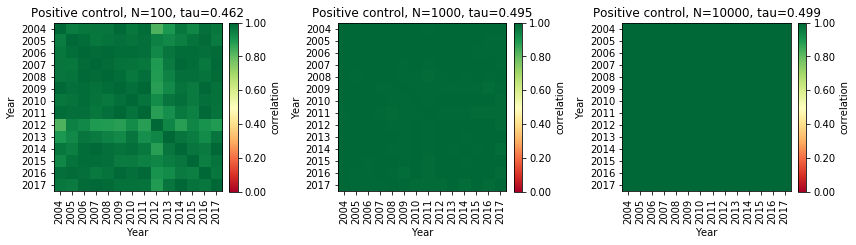

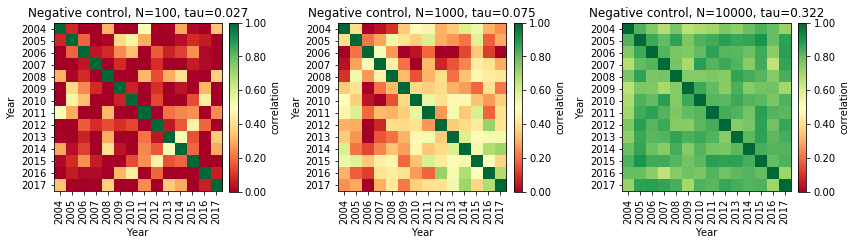

In [6]:
#CONTROLS
Y=range(2004,2018)
bins=np.arange(-10.5,11.5,1)
z=np.zeros(len(bins))
NL=[100,1000,10000]
#POSITIVE CONTROL
fig=plt.figure(figsize=(12,36))
for i,N in enumerate(NL):
    H=[z for y in Y]
    for j,y in enumerate(Y):
        RD=np.random.normal(0.0,1.0,N)
        h,b1=np.histogram(RD, bins=bins, density=True)
        H[j]=h
    H=np.array(H)
    R=np.corrcoef(H)
    tau,tauN=tautest(R)
    ax=fig.add_subplot(1,len(NL),i+1)
    I=plot_corr(R,Y,ax,fig,'Positive control, N='+str(N)+', tau='+str(tau)[0:5])
fig.tight_layout()

#NEGATIVE CONTROL
fig=plt.figure(figsize=(12,36))
for i,N in enumerate(NL):
    H=[z for y in Y]
    for j,y in enumerate(Y):
        RD=np.random.randint(-10,10+1,N)+np.random.normal(0,1,N)
        h,b1=np.histogram(RD, bins=bins, density=True)
        H[j]=h
    H=np.array(H)
    R=np.corrcoef(H)
    tau,tauN=tautest(R)
    ax=fig.add_subplot(1,len(NL),i+1)
    I=plot_corr(R,Y,ax,fig,'Negative control, N='+str(N)+', tau='+str(tau)[0:5])
fig.tight_layout()

## SUPPFIG S5B

T-test for tau : p-value= 0.0
T-test for tau_ 2 : p-value= 3.6653212689590195e-07
T-test for tau_ 3 : p-value= 1.2432137380970624e-10
T-test for tau_ 4 : p-value= 3.1095118881396423e-19
T-test for tau_ 5 : p-value= 5.713200567753368e-10
T-test for tau_ 6 : p-value= 2.8040955040411687e-57
T-test for tau_ 7 : p-value= 0.00013782131087952088
T-test for tau_ 8 : p-value= 1.6103096992592975e-08
T-test for tau_ 9 : p-value= 0.0013675384532315408
T-test for tau_ 10 : p-value= 5.426187760408782e-11
T-test for tau_ 11 : p-value= 4.112600868344251e-08
T-test for tau_ 12 : p-value= 2.3479565981984064e-10
T-test for tau_ 13 : p-value= 9.651712859543295e-11
T-test for tau_ 14 : p-value= 4.1025998981608693e-39


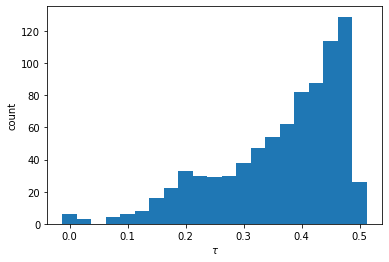

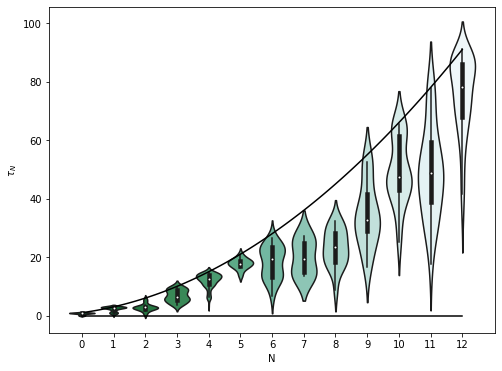

In [7]:
DFdist=pd.read_csv('results/correlations/tau_test.csv')
#T-TEST FOR ALL ATLAS
T=stats.ttest_1samp(DFdist['Tau'],0.0)
print('T-test for tau',': p-value=',T[1])
#T-TEST FOR EVERY N
for N in range(2,15):
    DFN=DFdist[DFdist['N']==N]
    TN=stats.ttest_1samp(DFN['TauN'],N*(N-1)/2)
    print('T-test for tau_',N,': p-value=',TN[1])

#PLOT HISTOGRAM OF TAUS
bins=list(np.arange(0.0,0.55,0.025))
fig=plt.figure()
ax=plt.gca()
n1,b1=np.histogram(DFdist['Tau'], bins=bins)
width=bins[1]-bins[0]
ax.bar(b1[0:-1],n1,width=width)
ax.set_xlabel('$\\tau$')
ax.set_ylabel('count')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

#PLOT TAU VERSUS N
fig=plt.figure(figsize=(8,6))
ax=sns.violinplot(y="TauN",x="N",data=DFdist, scale='width',
                  palette='BuGn_r', inner='box')
ax.set_ylabel('$\\tau_N$')
xp=np.linspace(0,12,100)
xp2=np.linspace(2,14,100)
yp=xp2*(xp2-1)/2
ax.plot(xp,yp,'k-')
ax.plot(xp,[0 for z in xp],'k-')
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# SUPPFIG S6

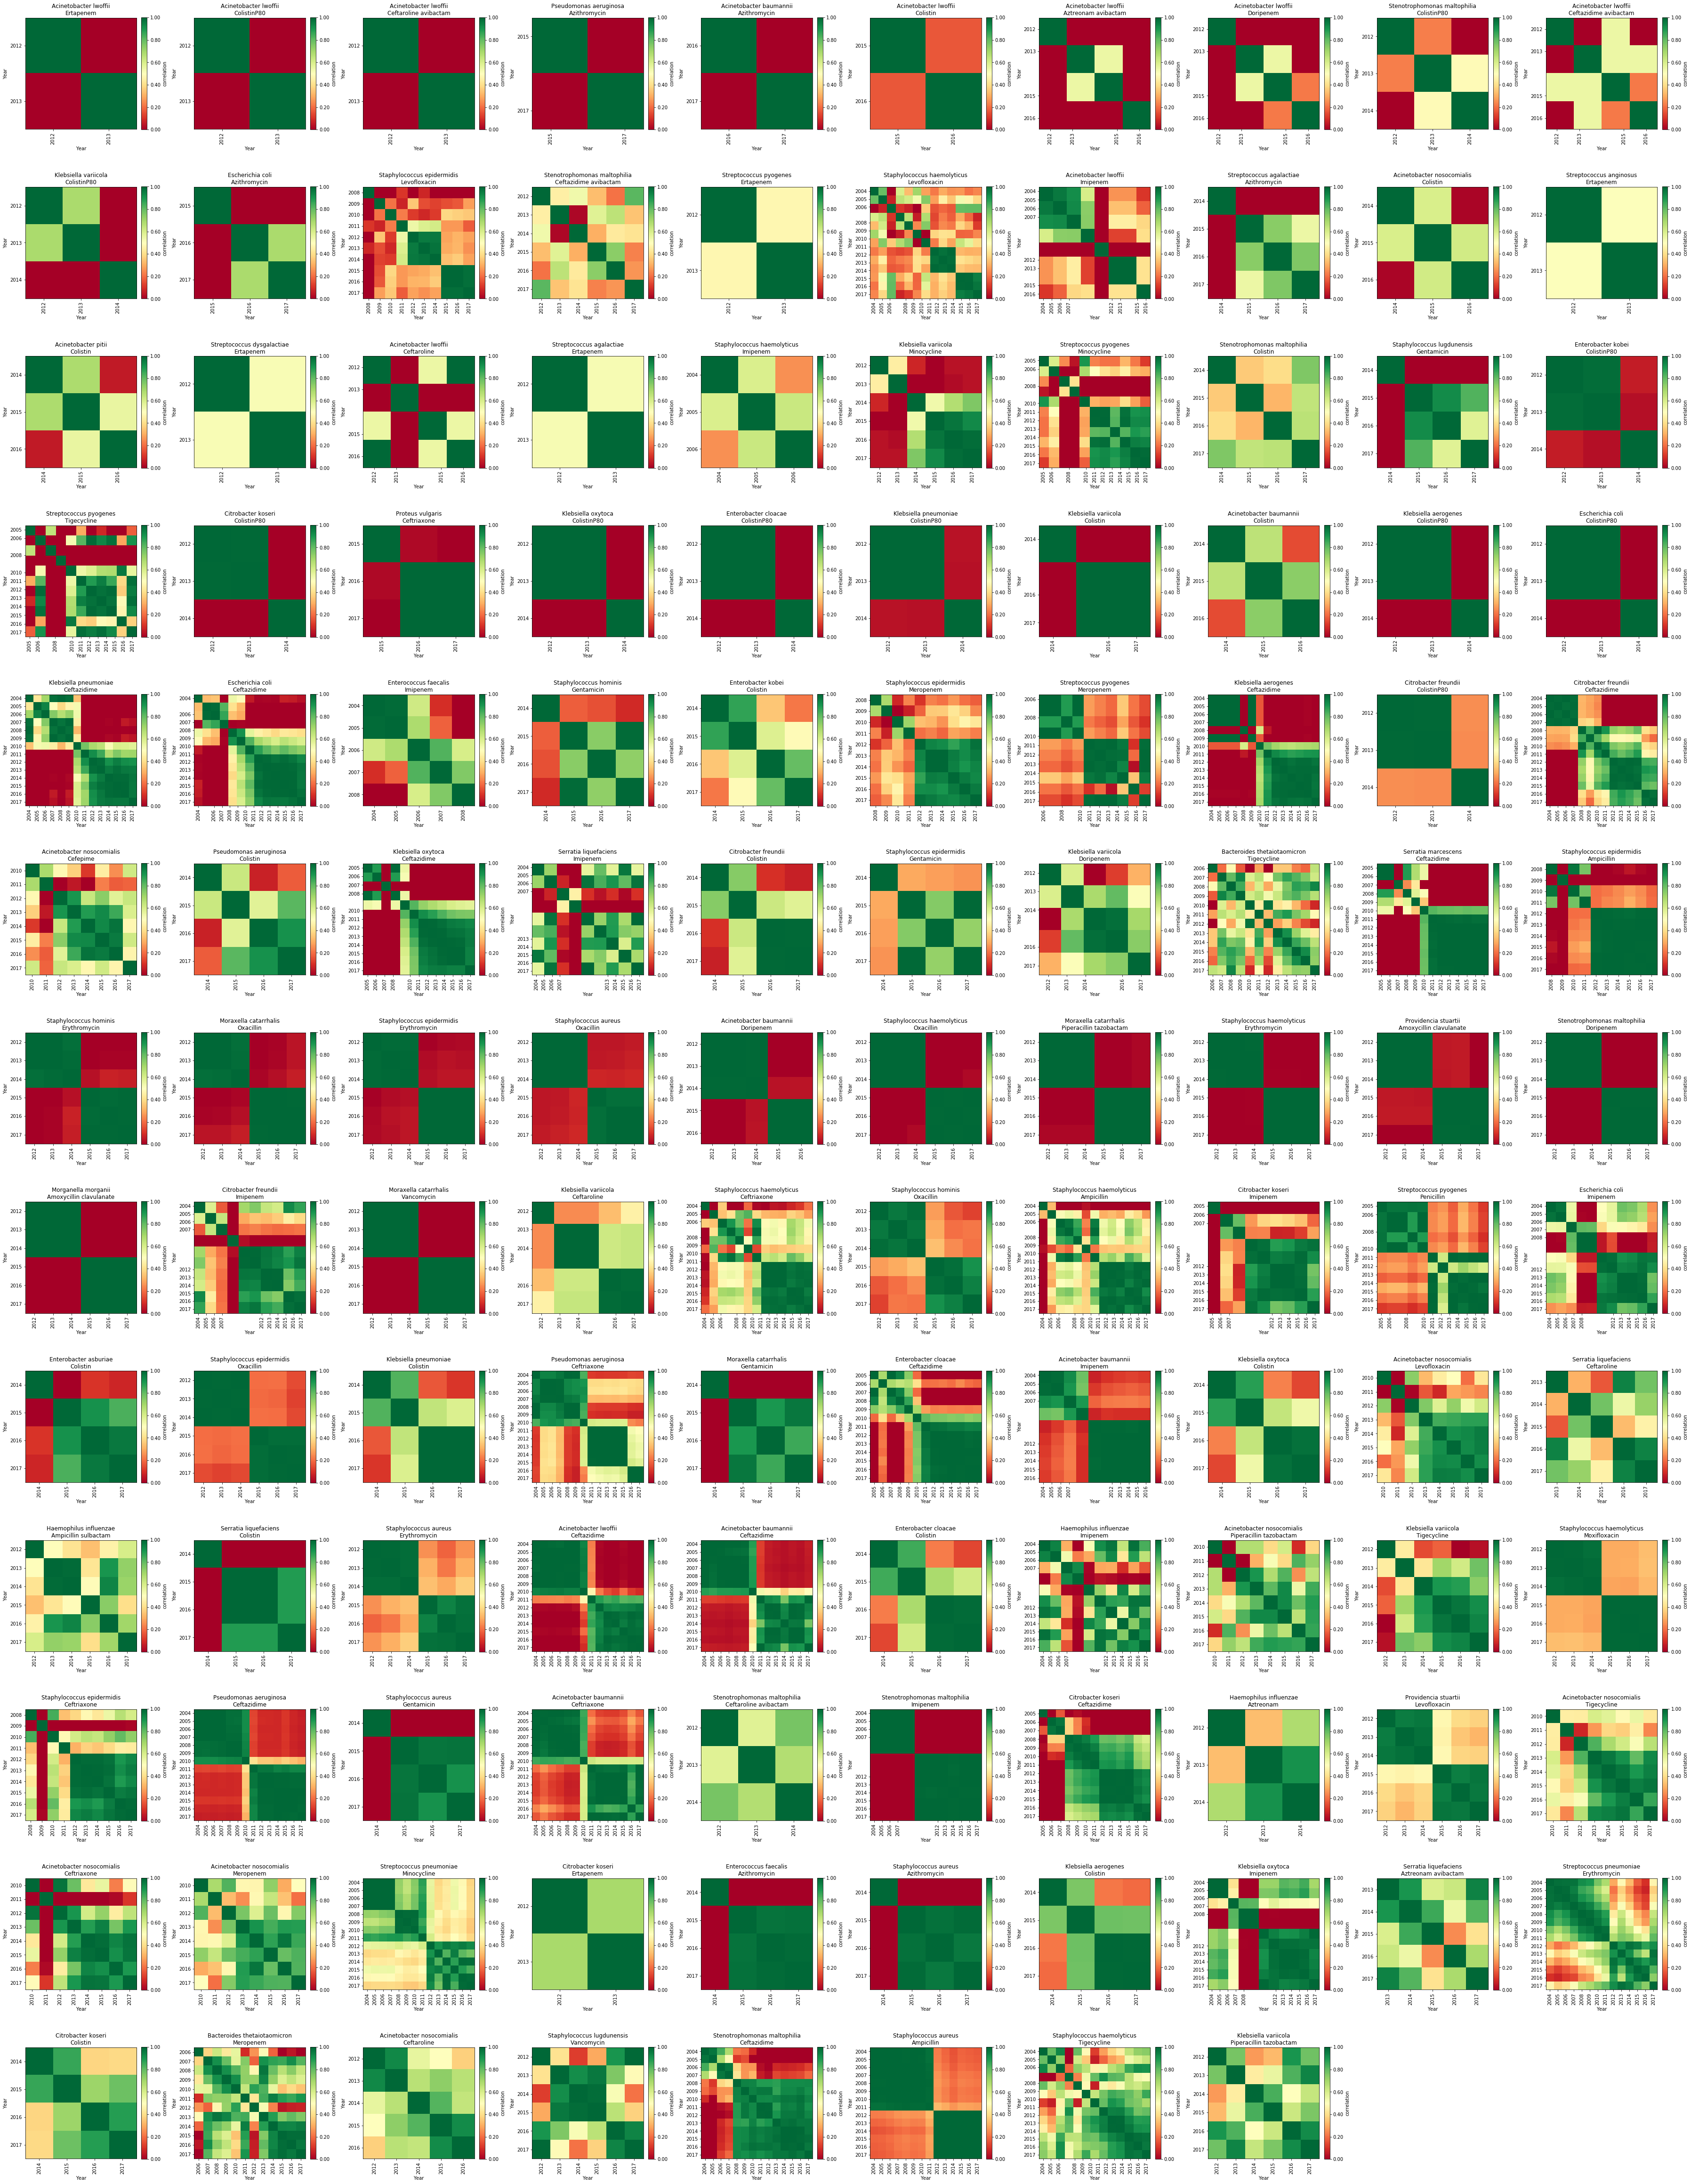

In [8]:
DFdist=pd.read_csv('results/correlations/tau_test.csv')
DFdist=DFdist[DFdist.Tau<0.25]
DFdist=DFdist.iloc[::-1]
DFdist=DFdist.reset_index(drop=True)
maxcols=10
maxrows=int(len(DFdist)/maxcols+1)
fig=plt.figure(figsize=(5*maxcols,5*maxrows))
#GENERATE FIGURE
for index,row in DFdist.iterrows():
    sp=row['Species']
    c1=row['Antibiotic']
    ax=fig.add_subplot(maxrows,maxcols,index+1)
    R,Y=read_corr(sp,c1)
    I=plot_corr(R,Y,ax,fig,sp+'\n'+c1)
fig.tight_layout()

# SUPP FIG S7

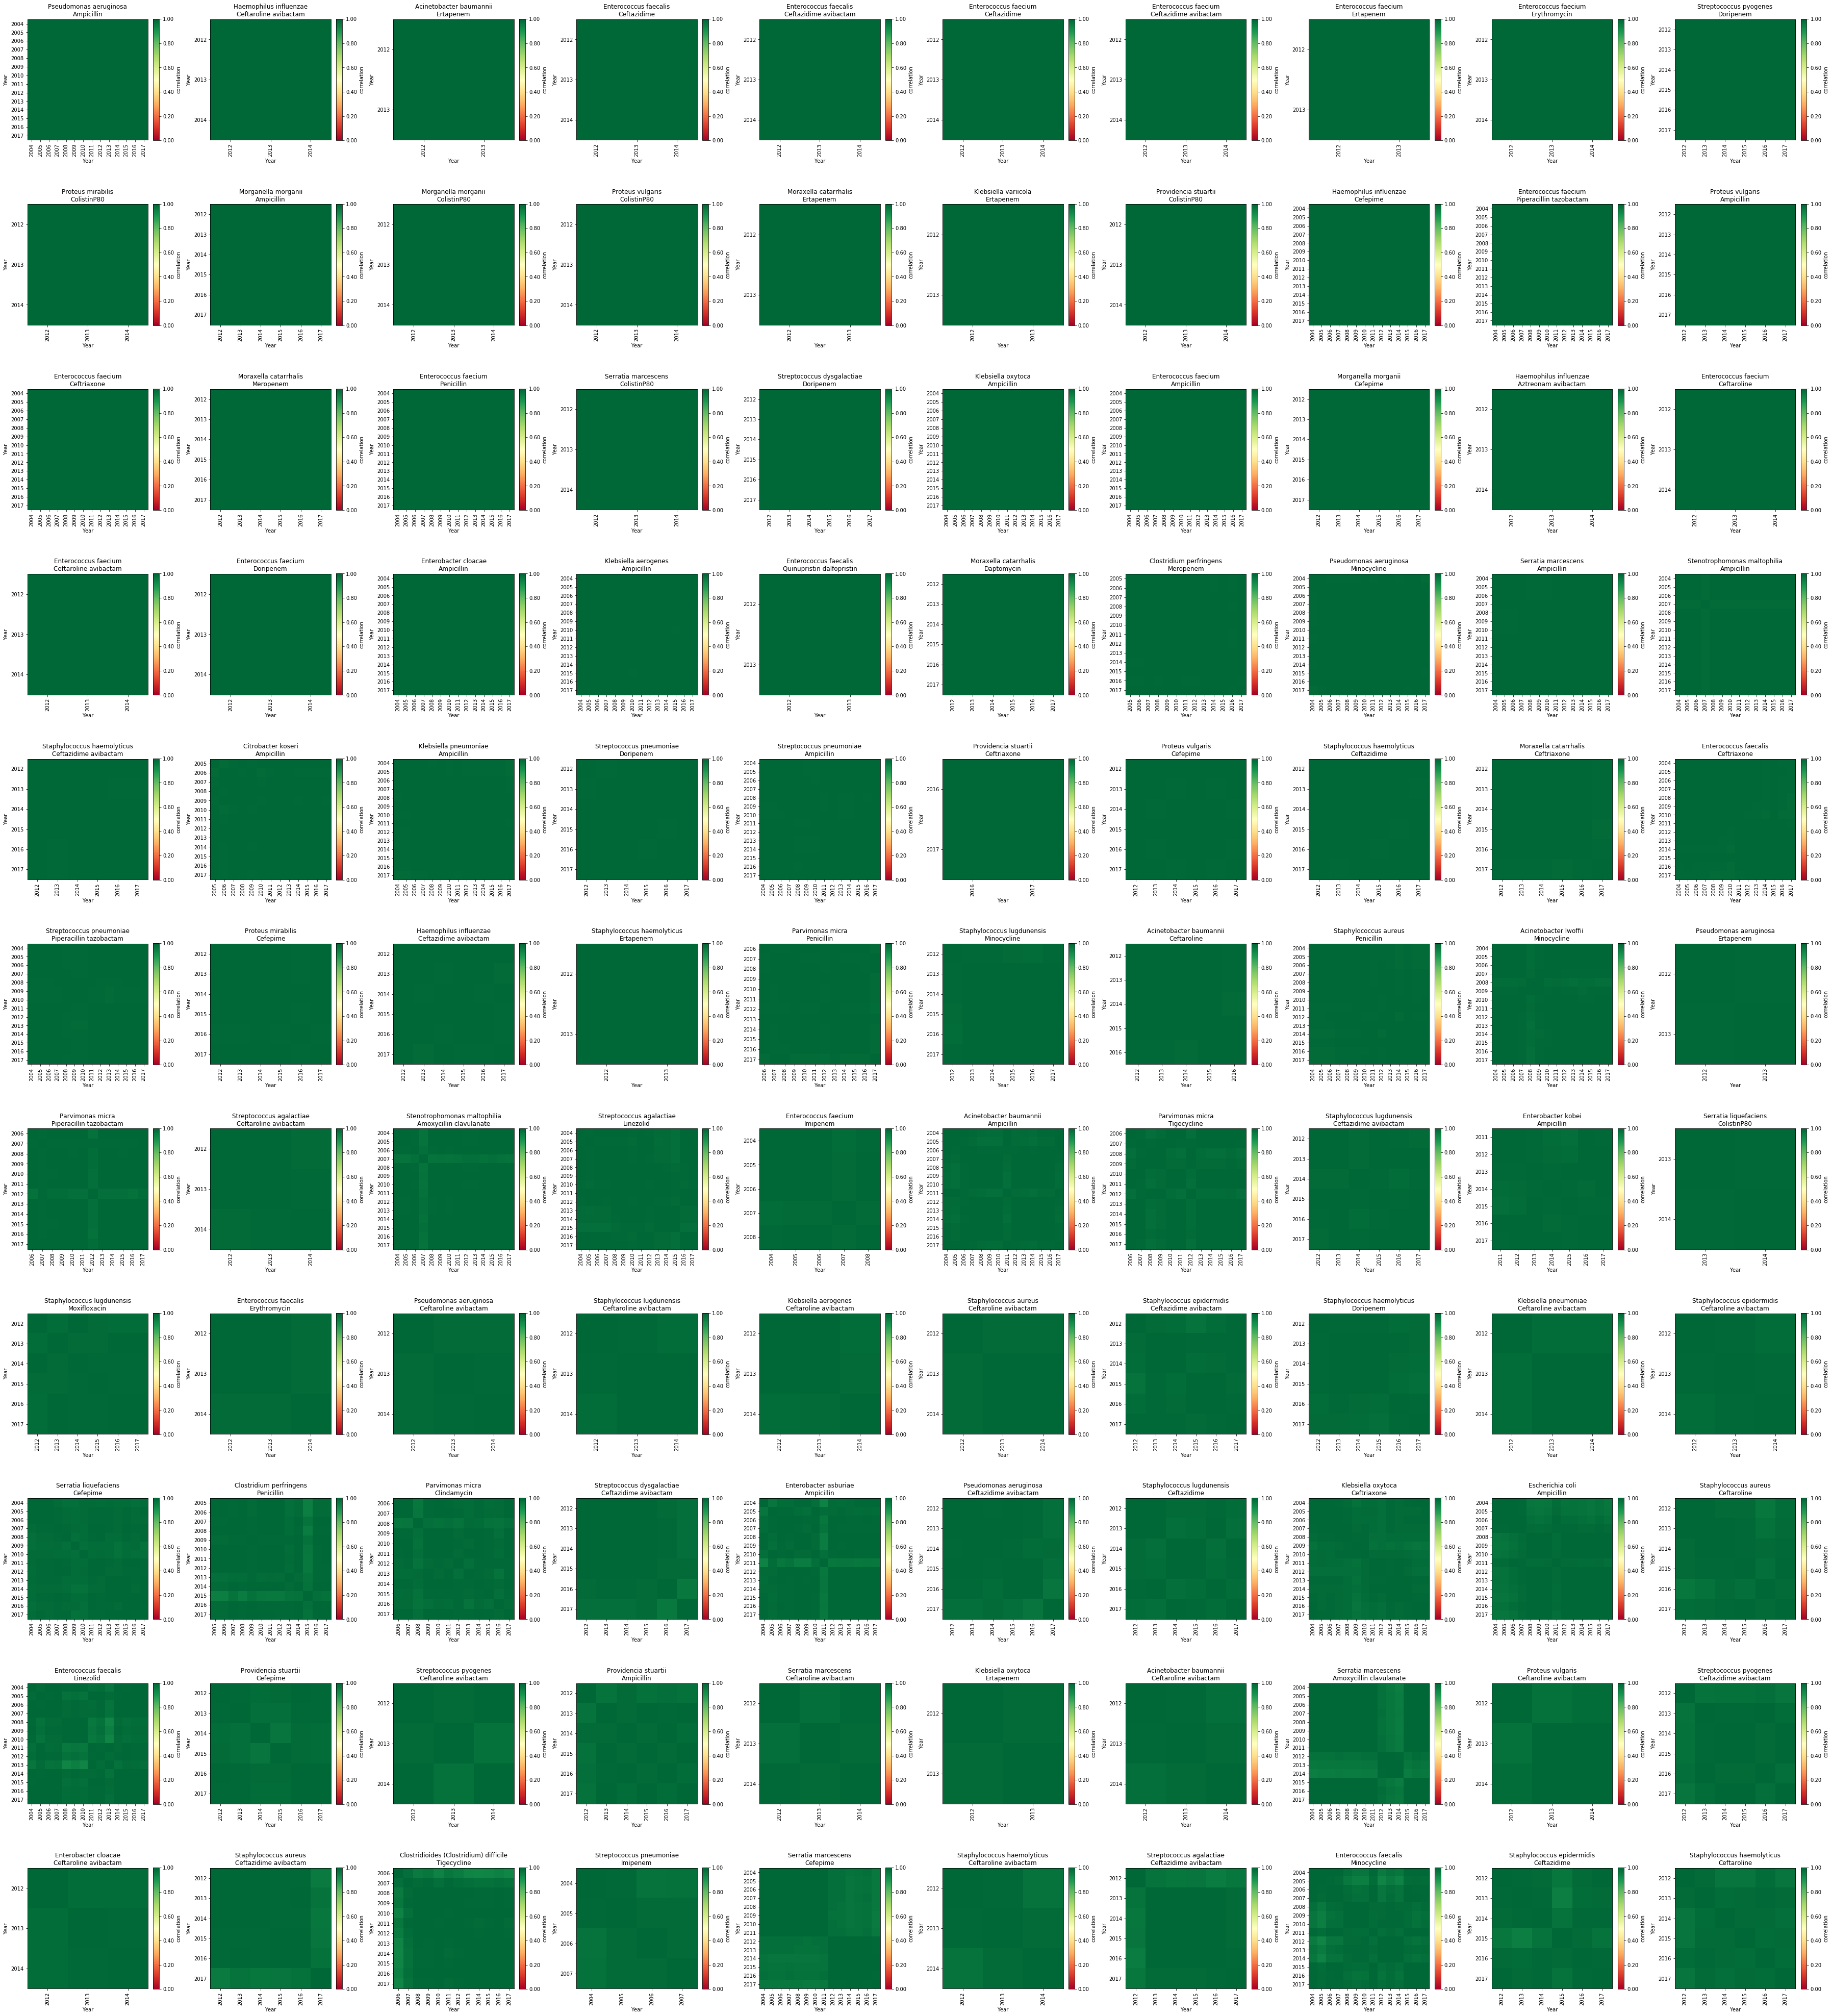

In [9]:
DFdist=pd.read_csv('results/correlations/tau_test.csv')
DFdist=DFdist[DFdist.Tau>0.485]
maxcols=10
maxrows=int(len(DFdist)/maxcols+1)
fig=plt.figure(figsize=(5*maxcols,5*maxrows))
#GENERATE FIGURE
for index,row in DFdist.iterrows():
    sp=row['Species']
    c1=row['Antibiotic']
    ax=fig.add_subplot(maxrows,maxcols,index+1)
    R,Y=read_corr(sp,c1)
    I=plot_corr(R,Y,ax,fig,sp+'\n'+c1)
fig.tight_layout()

# SUPPFIG S8

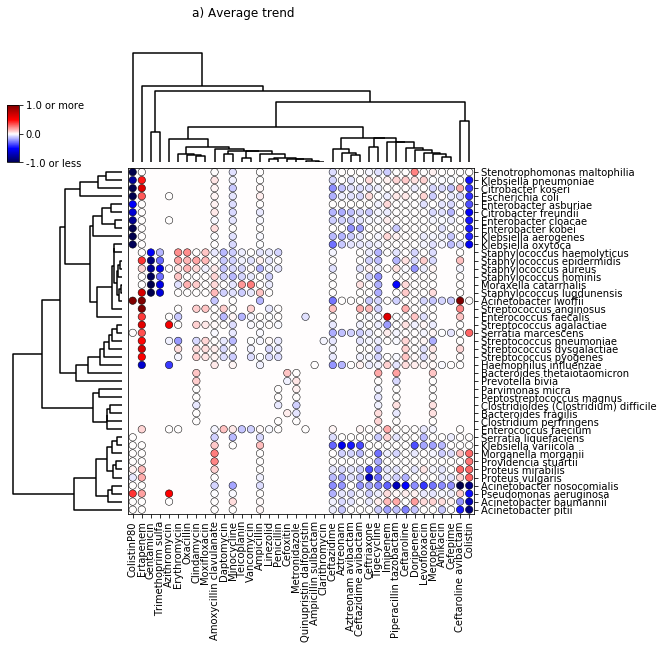

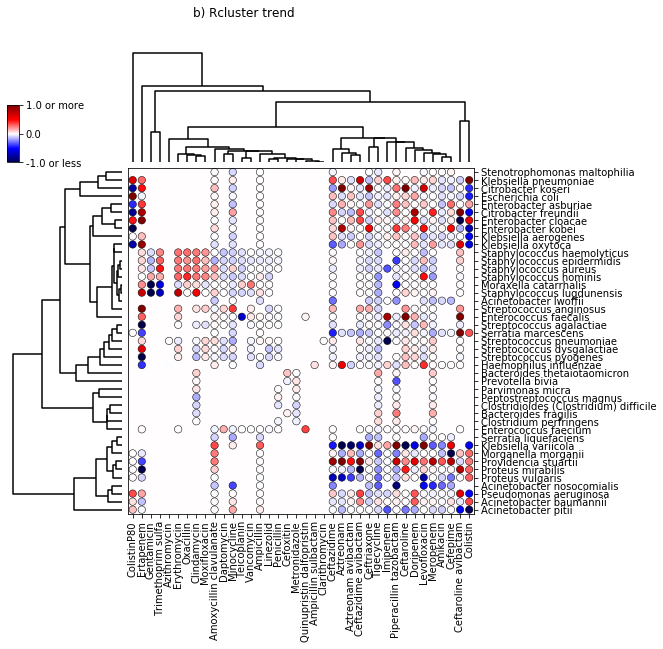

In [10]:
DFdata=pd.read_csv('data/mic_change_global.csv')
X=np.array(get_key(DFdata, 'Species'))
Y=np.array(get_key(DFdata, 'Antibiotic'))
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
SC={}
for index, row in DFdata.iterrows():        
    sp=row['Species']
    c1=row['Antibiotic']
    key=sp+'+'+c1
    SC[key]=row['MIC change']
#WE WILL USE THE SAME CLUSTERING AS IN FIG2B
Z,Y1,Y2=clustermap_clustering(X,Y,SC)
#NOW READ TRENDS FOR EUROPE
DFdata=pd.read_csv('data/mic_change_europe.csv')
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['MIC change']
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)
fig.suptitle('a) Average trend');
#NOW READ RTRENDS FOR EUROPE
DFdata=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP_europe.csv')
xp=DFdata['Species']
yp=DFdata['Antibiotic']
zp=DFdata['Rtrend']
fig,ax=plot_clustermap(X,Y,Z,Y1,Y2,xp,yp,zp)
fig.suptitle('b) Rcluster trend');

# SUPPFIG S9

## SUPPFIG S9A

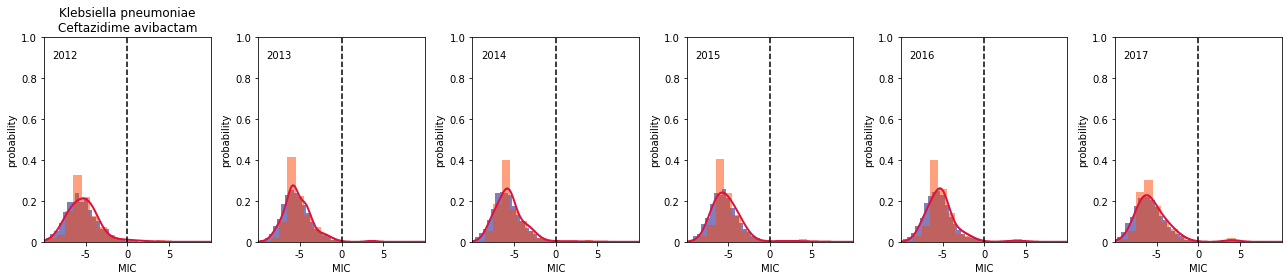

In [11]:
sp='Klebsiella pneumoniae'
dr='Ceftazidime avibactam'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
fig=plot_michistograms(pY,oH,sH,gM,title)

## SUPPFIG S9B

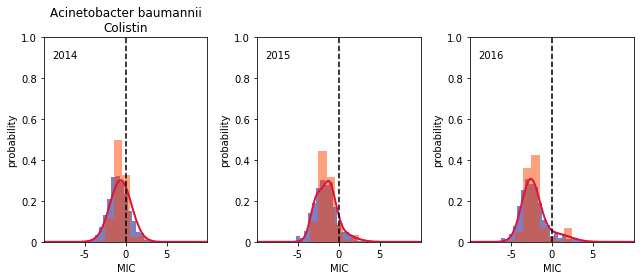

In [12]:
sp='Acinetobacter baumannii'
dr='Colistin'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
fig=plot_michistograms(pY,oH,sH,gM,title)

# SUPPFIG S10

## SUPPFIG S10A

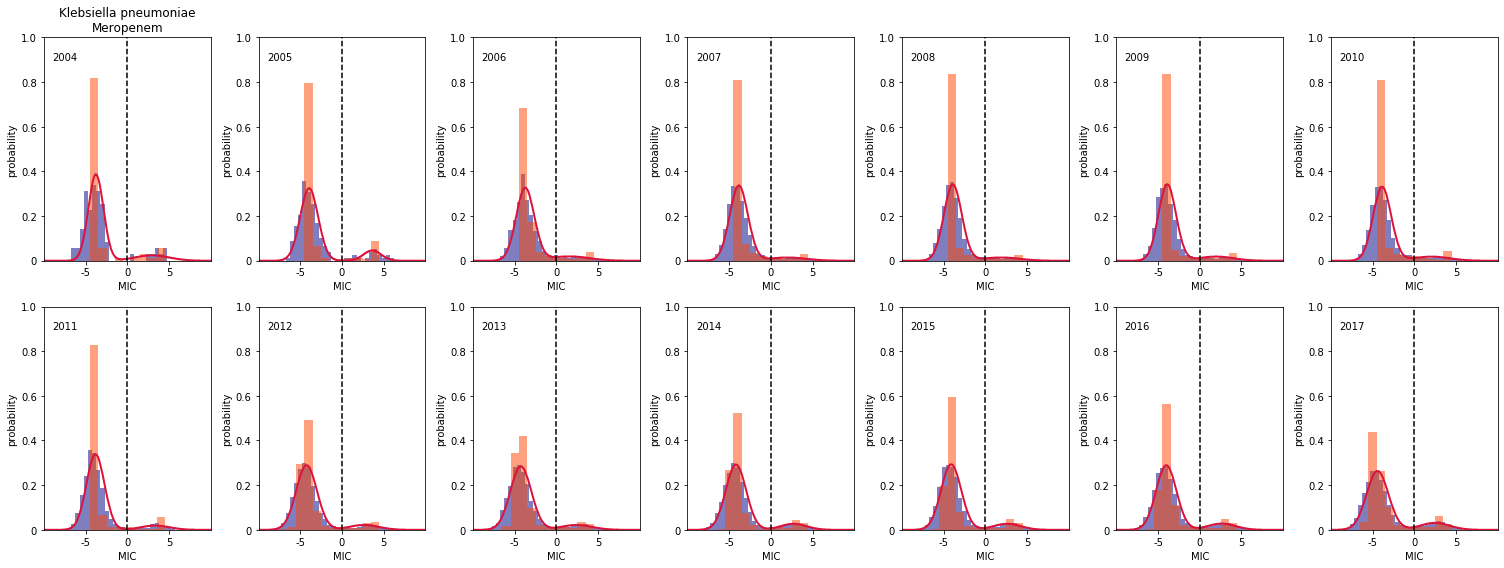

In [13]:
sp='Klebsiella pneumoniae'
dr='Meropenem'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
fig=plot_michistograms(pY,oH,sH,gM,title)

## SUPPFIG S10B

In [ ]:
sp='Klebsiella pneumoniae'
dr='Imipenem'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
fig=plot_michistograms(pY,oH,sH,gM,title)

## SUPPFIG S10C

In [ ]:
sp='Klebsiella pneumoniae'
dr='Ertapenem'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
fig=plot_michistograms(pY,oH,sH,gM,title)

## SUPPFIG S10D

In [ ]:
sp='Klebsiella pneumoniae'
dr='Doripenem'
title=sp+'\n'+dr
gM, pY=read_micdist(sp,dr)
oH, sH=read_hist(sp,dr)
fig=plot_michistograms(pY,oH,sH,gM,title)

# SUPPFIG S11

## SUPPFIG S11A

In [ ]:
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends_noBP.csv')
pL=get_key(DF, 'Species')
drugs=get_key(DF, 'Antibiotic')

x=DF['Strend']
xerr=DF['Strenderror']
y=DF['Rtrend']
yerr=DF['Rtrenderror']

color1='#341a56'
color2='red'
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.errorbar(x,y,fmt='o',xerr=xerr,yerr=yerr,color=color1,alpha=0.5)
minX=-3
maxX=3
xp=np.linspace(minX, maxX,100)
minY=-4
maxY=4
yp=np.linspace(minY, maxY,100)
ax.plot(xp,0*xp,'-k', lw=1)
ax.plot(0*yp,yp,'-k', lw=1)
ax.plot(xp,xp,'--', color=color2)
ax.set_xlabel('S cluster MIC change')
ax.set_ylabel('R cluster MIC change')
ax.set_xlim([minX,maxX])
ax.set_ylim([minY,maxY]);

## SUPPFIG S11B

In [ ]:
DF=pd.read_csv('results/Rcluster/resistant_cluster_trends.csv')
pL=get_key(DF, 'Species')
drugs=get_key(DF, 'Antibiotic')

x=DF['Rvalue']
y=DF['Rtrend']

#FIRST QUADRANT
DF1=DF[(DF.Rvalue>0) & (DF.Rtrend>0)]
#SECOND QUDRANT
DF2=DF[(DF.Rvalue<0) & (DF.Rtrend>0)]
#THIRD QUADRANT
DF3=DF[(DF.Rvalue<0) & (DF.Rtrend<0)]
#FOURTH QUADRANT
DF4=DF[(DF.Rvalue>0) & (DF.Rtrend<0)]
#HORIZONTAL LINE
DF5=DF[DF.Rtrend==0]
#VERTICAL LINE
DF6=DF[DF.Rvalue==0]

minx=np.floor(x.min())
miny=np.floor(y.min())
maxx=np.ceil(x.max())
maxy=np.ceil(y.max())
miny=-1
maxy=1
minx=-5
maxx=5
xedges=np.linspace(minx,maxx,31)
yedges=np.linspace(miny,maxy,30)

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
I=ax.imshow(H, aspect='auto',interpolation='nearest', origin='low', 
          cmap='Purples', vmin=0, vmax=20,
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
cbar=plt.colorbar(I)#, ax=ax)
cbar.ax.set_yticklabels(cbar.ax.get_yticks())
cbar.ax.set_ylabel('count')
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.set_xlabel('log$_2$MIC')
ax.set_ylabel('log$_2$MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.plot(xedges,[0 for z in xedges],'k')
ax.plot([0 for z in yedges],yedges,'k')
ax.text(2.00,0.5,str(len(DF1)))
ax.text(-3.00,0.5,str(len(DF2)))
ax.text(-3.00,-0.5,str(len(DF3)))
ax.text(2.00,-0.5,str(len(DF4)))
ax.text(-4.00,-0.02,str(len(DF5)));

# SUPPFIG S12

In [ ]:
sp='Pseudomonas aeruginosa'
dr1='Doripenem'
dr2='Meropenem'
dr3='Imipenem'
RDori=pd.read_csv('results/Rcluster/'+sp+'_'+dr1+'_Rcluster.csv')
RMero=pd.read_csv('results/Rcluster/'+sp+'_'+dr2+'_Rcluster.csv')
RImi=pd.read_csv('results/Rcluster/'+sp+'_'+dr3+'_Rcluster.csv')
pC1=get_key(RDori,'Country')
pC2=get_key(RMero,'Country')
pC3=get_key(RImi,'Country')
pC=[]
for country in pC1:
    if country in pC2 and country in pC3:
        pC.append(country)
pC=sorted(pC)
vals=np.linspace(0,1,len(pC))#each class will have one color
cmap=plt.cm.colors.ListedColormap(plt.cm.viridis(vals))
#SYMBOLS AND COLORS FOR EACH COUNTRY
LS=['o', '^', 's', '<', 'X', '>', 'P']
LM={}
LC={}
LA={}
for count, dr in enumerate(pC):
    LM[dr]=LS[count%len(LS)]
    LC[dr]=cmap(count/len(pC))

fig=plt.figure(figsize=(10,5))
handles=[]
labels=[]

#DORI VS MERO
L=[]
ax=fig.add_subplot(1,2,1)
maxx=-1
maxy=-1
minx=1
miny=1
for country in pC:
    R1=RDori[RDori.Country==country]
    R2=RMero[RMero.Country==country]
    if R1.empty or R2.empty: continue
    #DORI TREND
    x1=R1['Year'].tolist()
    y1=R1['MIC'].tolist()
    s1,i1,r1,p1,std1=stats.linregress(x1,y1)
    if True:#p1<0.05:
        x=s1
        xerr=std1
    else:
        x=0.0
        xerr=0.0
    #MERO TREND
    x2=R2['Year'].tolist()
    y2=R2['MIC'].tolist()
    s2,i2,r2,p2,std2=stats.linregress(x2,y2)
    if True:#p2<0.05:
        y=s2
        yerr=std2
    else:
        y=0.0
        yerr=0.0
    maxx=max(x,maxx)
    minx=min(x,minx)
    maxy=max(y,maxy)
    miny=min(y,miny)
    ax.scatter(x,y,edgecolors='black',color=LC[country],marker=LM[country], 
               s=150, zorder=2, label=country)
    ax.errorbar(x,y,fmt='o',color=LC[country],markersize=0, 
                xerr=xerr,yerr=yerr, zorder=1, alpha=0.5)
#LABELS
ax.set_xlabel('Doripenem MIC change')
ax.set_ylabel('Meropenem MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
yp=np.linspace(-40,40,100)
xp=[0 for z in yp]
ax.plot(yp,yp, '-k', linewidth=2)
ax.set_ylim([miny-0.1,maxy+0.1])
ax.set_xlim([minx-0.1,maxx+0.1])
handles1, labels1 = ax.get_legend_handles_labels()
handles+=handles1
labels+=labels1

#DORI VS IMI
ax=fig.add_subplot(1,2,2)
maxx=-1
maxy=-1
minx=1
miny=1
for country in pC:
    R1=RDori[RDori.Country==country]
    R2=RImi[RImi.Country==country]
    if R1.empty or R2.empty: continue
    #DORI TREND
    Y1=get_key(R1,'Year')
    if len(Y1)<2: continue
    x1=R1['Year'].tolist()
    y1=R1['MIC'].tolist()
    s1,i1,r1,p1,std1=stats.linregress(x1,y1)
    if True:#p1<0.05:
        x=s1
        xerr=std1
    else:
        x=0.0
        xerr=0.0
    #IMI TREND
    Y2=get_key(R2,'Year')
    if len(Y2)<2: continue
    x2=R2['Year'].tolist()
    y2=R2['MIC'].tolist()
    s2,i2,r2,p2,std2=stats.linregress(x2,y2)
    if True:#p2<0.05:
        y=s2
        yerr=std2
    else:
        y=0.0
        yerr=0.0
    maxx=max(x,maxx)
    minx=min(x,minx)
    maxy=max(y,maxy)
    miny=min(y,miny)
        # print(sp,country,len(R1),len(R2),s1,p1,s2,p2)
        # L.append([x,y,country])
    ax.scatter(x,y,edgecolors='black',color=LC[country],marker=LM[country], 
               s=150, zorder=2, label=country)
    ax.errorbar(x,y,fmt='o',color=LC[country],markersize=0, 
                xerr=xerr,yerr=yerr, zorder=1, alpha=0.5)
#LABELS
ax.set_xlabel('Doripenem MIC change')
ax.set_ylabel('Imipenem MIC change')
ax.set_yticklabels(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
yp=np.linspace(-40,40,100)
xp=[0 for z in yp]
ax.plot(yp,yp, '-k', linewidth=2)
ax.set_ylim([miny-0.1,maxy+0.1])
ax.set_xlim([minx-0.1,maxx+0.1])
handles1, labels1 = ax.get_legend_handles_labels()
handles+=handles1
labels+=labels1
#ORGANIZE LABELS
H=[0 for z in pC]
L=[z for z in pC]
for h,l in zip(handles,labels):
    index1=L.index(l)
    H[index1]=h
fig.legend(H, L, loc='lower left', bbox_to_anchor=[1.01, 0.0, 0.3, 0.3],
          bbox_transform=ax.transAxes, ncol=2)
fig.tight_layout()

# SUPPFIG S13

In [ ]:
sp='Streptococcus pneumoniae'
dr='Clindamycin'
#CORRELELOGRAM
R,Y=read_corr(sp,dr)
fig=plt.figure()
ax=plt.gca()
title=sp+'\n'+dr    
I=plot_corr(R,Y,ax,fig,title)
#WATERFALL PLOT
Z, pY=read_micdist(sp,dr)
fig=plt.figure()
ax=plot_waterfall(Z,pY,fig,title)